In [1]:
import sys
sys.path.append('D:/classes/project/lip_reading/speaking/')

from dataloader import get_file_data, load_samples_OriginalDataStructure, get_file_data_sentence
import torch
import os
from tqdm import tqdm
from transformers import AutoTokenizer
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%load_ext autoreload
%autoreload 2


torch.manual_seed(42)


In [2]:
base_path = "D:/classes/project/LRS2/extracted_data/mvlrs_v1/"
length_video = 125 
dataset_name="pretrain"
samples = load_samples_OriginalDataStructure(base_path, dataset_name=dataset_name)

print("Total samples train:", len(samples))  
# print("Total samples val:", len(val_data_loader))  



Total samples train: 96318


In [59]:
def get_distributions(samples, tokenizer):
    tokenized_distribution = defaultdict(int)
    word_distribution = defaultdict(int)
    for video_path, label_path in samples:
        with open(label_path, "r") as F:
            tokens = tokenizer(get_file_data_sentence(F), add_special_tokens=False)['input_ids']
            for token in tokens:
                tokenized_distribution[token] += 1
                word_distribution[tokenizer.decode(token)] += 1
    return tokenized_distribution, word_distribution

In [60]:
tokenizer=AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokenized_distribution, word_distribution = get_distributions(samples, tokenizer)

d:\Users\DK\conda\envs\cs231\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors


In [61]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import heapq


def get_top_k(tokenized_distribution, word_distribution):
    heap = []

    values = []
    frequencies = []
    total_words = 0

    for value, freq in tokenized_distribution.items():
        values.append(value)
        frequencies.append(freq)
        if len(heap) >= 100:
            if heap[0][0] < freq:
                heapq.heappop(heap)
            else:
                continue 
        heapq.heappush(heap, (freq, value))
    data = np.repeat(values, frequencies)
    total_words = data.shape[0]

    top_100k_values = []
    top_100k_freq = []
    for freq, value in heap:
        top_100k_values.append(value)
        top_100k_freq.append(freq)
    data = np.repeat(top_100k_values, top_100k_freq)
    return heap, values, frequencies,  top_100k_values, top_100k_freq, total_words



In [62]:
heap, values, frequencies,  top_100k_values, top_100k_freq, total_words = get_top_k(tokenized_distribution, word_distribution)
print(heap)
print(max(heap))
print(max(frequencies))
print(total_words)

[(3328, 2122), (3402, 2046), (3340, 2191), (3474, 2067), (3956, 2157), (3344, 1040), (3477, 2242), (4481, 2040), (3605, 2215), (3963, 2222), (4587, 2059), (3397, 2014), (3993, 2071), (3972, 2204), (4684, 2156), (4494, 2011), (5371, 2051), (4872, 2029), (4522, 2256), (5691, 2123), (4195, 2129), (5968, 2018), (7059, 2041), (5718, 2068), (3965, 2038), (5501, 2085), (7904, 2028), (5580, 2030), (4937, 2053), (6918, 2039), (4910, 2062), (5662, 2042), (6257, 2428), (8006, 2066), (7830, 2065), (7561, 2113), (5294, 2175), (5071, 2111), (4585, 2010), (5905, 2016), (5882, 2288), (6400, 2115), (5440, 2020), (6190, 2138), (8794, 2024), (8920, 2310), (7369, 2183), (7257, 2013), (8048, 1049), (3991, 2037), (36124, 1055), (15299, 2021), (5848, 2019), (19927, 2001), (14788, 2022), (5780, 2043), (64170, 2000), (16350, 2023), (8526, 2026), (15173, 2027), (23830, 2003), (6331, 2182), (7859, 2033), (41450, 2017), (6647, 2052), (6893, 2015), (6410, 2131), (15809, 2006), (14691, 2061), (21472, 2057), (14288,

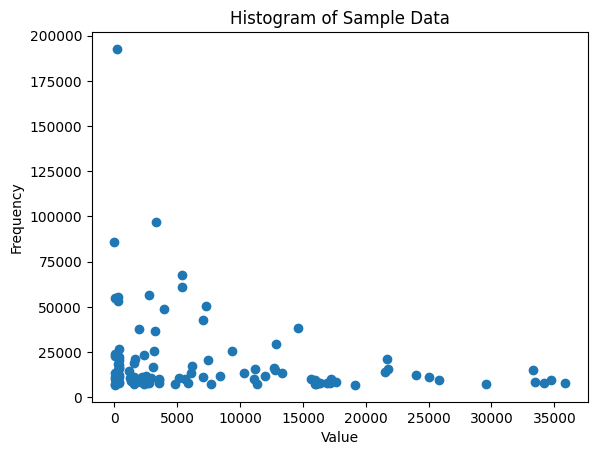

In [49]:
plt.scatter(top_100k_values, top_100k_freq)

plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [50]:
len(top_100k_values)

100

In [63]:
def plot_dist(tokenizer_name, save_file=True):
        res=[]
        for i in range(len(top_100k_values)):
                res.append((top_100k_freq[i], tokenizer.decode(top_100k_values[i]),top_100k_values[i]))

                words = []
                freq_top = []
                # with open(f"{dataset_name} distribution top {str(len(top_100k_values))} values.txt", "w") as F:
        for freq, word, token_id in sorted(res, reverse=True):
                words.append(word)
                freq_top.append(freq)
        sns.barplot(x=words, y=freq_top, palette='viridis')
        plt.title(f'{tokenizer_name} Top {len(words)} words Qualitative Plot no special tokens')
        plt.xticks([])
        plt.ylabel('Frequency')
        plt.gcf().set_size_inches(10, 6)
        if save_file:
                plt.savefig(f'{tokenizer_name} Top {len(words)} words Qualitative Plot no special tokens.png')

        plt.show()

        words2 = []
        freq_top2 = []
        break_point = 20
        for freq, word, token_id in sorted(res, reverse=True):
                words2.append(word)
                freq_top2.append(freq)
                if len(words2) == break_point:
                        break

        sns.barplot(x=words2, y=freq_top2, palette='viridis')
        plt.title(f'{tokenizer_name} Top {break_point} words  Plot no special tokens')
        plt.ylabel('Frequency')
        plt.xlabel('Words')
        plt.gcf().set_size_inches(10, 6)
        if save_file:
                plt.savefig(f'{tokenizer_name} Top {break_point} words  Plot no special tokens.png')
        
        plt.show()

        sns.scatterplot(x=words2, y=freq_top2)

        plt.title(f'{tokenizer_name} Histogram of Sample Data no special tokens')
        plt.xlabel('Value')
        plt.gcf().set_size_inches(10, 6)
        if save_file:
                plt.savefig(f'{tokenizer_name} Histogram of Sample Data no special tokens.png')


        plt.ylabel('Frequency')
        plt.show()
        y = np.array(freq_top2)/total_words


        sns.barplot(x=words2, y=y, palette='viridis')
        plt.title(f'{tokenizer_name} Top {break_point} words Probability no special tokens')
        plt.ylabel('Frequency')
        plt.xlabel('Words')
        plt.gcf().set_size_inches(10, 6)
        if save_file:
                plt.savefig(f'{tokenizer_name} Top {break_point} words  Probability no special tokens.png')

        plt.show()

C:\Users\darke\AppData\Local\Temp\ipykernel_17772\3552527833.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=freq_top, palette='viridis')


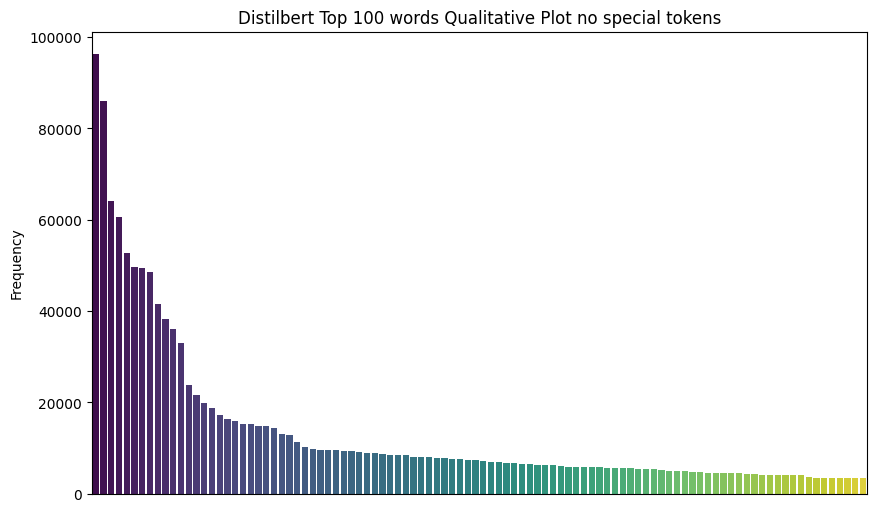

C:\Users\darke\AppData\Local\Temp\ipykernel_17772\3552527833.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words2, y=freq_top2, palette='viridis')


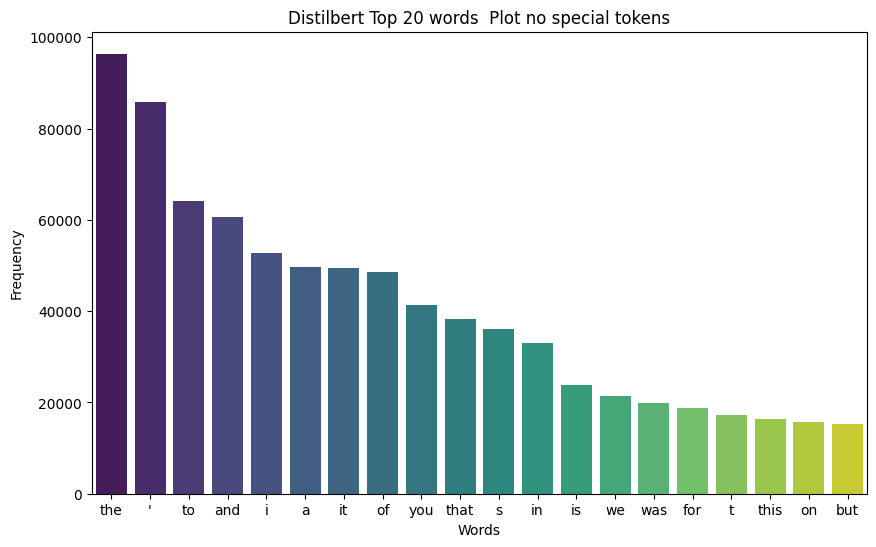

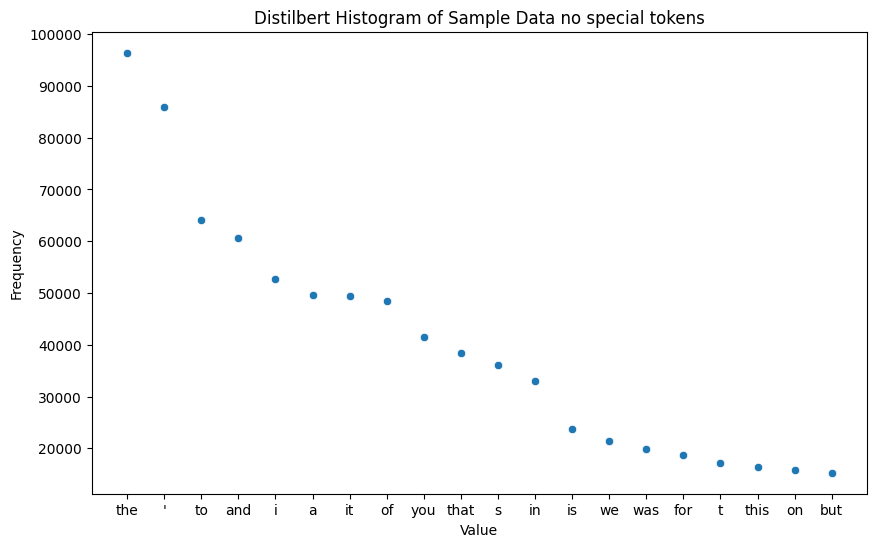

C:\Users\darke\AppData\Local\Temp\ipykernel_17772\3552527833.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words2, y=y, palette='viridis')


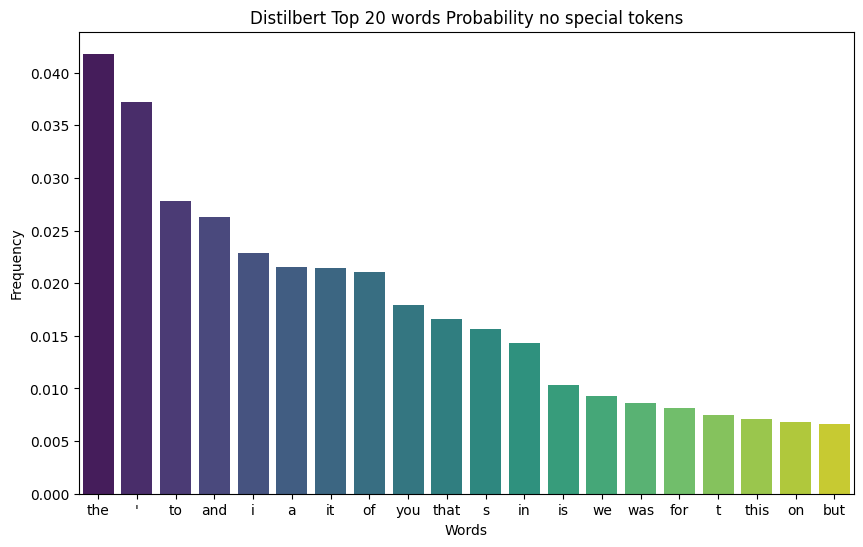

In [64]:
plot_dist("Distilbert", save_file=True)